In [11]:
import reader as rd
from matplotlib import pyplot as plt
import processing_data as pd
import numpy as np
from AngleComputation import AngleComputation
from utils import compute_points

In [12]:
'''
Set Datafolder and load the Data here.
'''
acc, gyro = rd.csv_to_array(folder='dataset/track1')
sampling_rate = rd.get_sample_freq(acc)
time_window = 30



<function matplotlib.pyplot.show(close=None, block=None)>

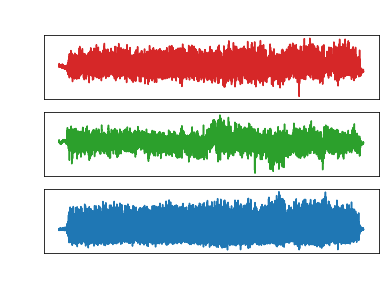

In [13]:
'''
Plot first 20 seconds of Data raw Data
'''
time_total = [i[0] for i in acc]
#time = time_total[:time_window*sampling_rate]
time = time_total

#x_acc = [i[1] for i in acc][:time_window*sampling_rate]
#y_acc= [i[2] for i in acc][:time_window*sampling_rate]
#z_acc = [i[3] for i in acc][:time_window*sampling_rate]

x_acc = [i[1] for i in acc][:]
y_acc= [i[2] for i in acc][:]
z_acc = [i[3] for i in acc][:]

fig, axs = plt.subplots(3)

fig.suptitle('Raw Acceleration Data', color='white')

axs[0].plot(time, x_acc, 'tab:red')
axs[0].set(ylabel='x_acceleration')
axs[1].plot(time, y_acc, 'tab:green')
axs[1].set(ylabel='y_acceleration')
axs[2].plot(time, z_acc, 'tab:blue')
axs[2].set(ylabel='z_acceleration')

for a in axs:
    a.set(xlabel='time')
    a.tick_params( colors='white')
    a.xaxis.label.set_color('white')
    a.yaxis.label.set_color('white')
plt.show

In [14]:
'''
normalize data and use peak detection algorithm to calculate steps
'''
prepro_acc = pd.acc_lowpass_filter(acc[:,1:], sampling_rate)
step_count, steps, norm_accel = pd.peakfinder(prepro_acc, sampling_rate)



TypeError: only integer scalar arrays can be converted to a scalar index

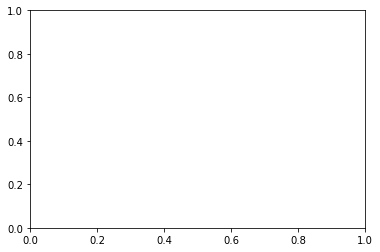

In [15]:
'''
visualize the normalized acc_data + mark the peaks = steps
'''
fig = plt.figure()
ax = fig.gca()

norm_accel =  norm_accel[:int(time_window*sampling_rate)]
#time  = np.array(time)
#ax.plot(time, norm_accel, linewidth=0.3, zorder=-1, color='tab:blue')
steps = steps[steps < len(time)]
ax.scatter(time[steps], norm_accel[steps], c='r', marker='o')
ax.set(xlabel='time in seconds', ylabel='normalized acceleration', title='Estimated Steps')
ax.tick_params( colors='white')
ax.title.set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

print("Estimated number of steps in this Timewindow: "+str(len(steps)))
print("Total estimated number of steps for filtered data: "+str(step_count))

In [16]:
'''
print some Numbers here
'''
print("Estimated number of steps in this Timewindow: "+str(len(steps)))
print("Total estimated number of steps for filtered data: "+str(step_count))

Estimated number of steps in this Timewindow: 756
Total estimated number of steps for filtered data: 756


In [17]:
# gyro data tests
angle_comp_obj = AngleComputation(acc_data=acc, len_init_time=9, freq=400)
turning_angles = angle_comp_obj.get_angle(omega=gyro, step_idxs=steps , delta_t=0.00252 )

In [18]:
x, y = compute_points(turning_angles)

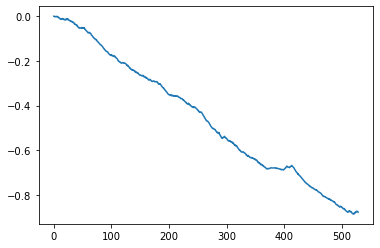

In [19]:
plt.plot(x,y)